In [1568]:
# Importing dependencies
import matplotlib.pyplot as plt
import numpy as np
from numpy import absolute
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import xgboost
from xgboost import XGBRegressor
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.0


In [1569]:
pwd()

'C:\\Users\\John\\Documents\\Berkeley\\Classwork\\group project\\ML-branch\\Group_Project'

In [1570]:
data = pd.read_csv('C:\\Users\\John\\Documents\\Berkeley\\Classwork\\group project\\data\\Albert_cleaned_sets\\percaps_w_legality.csv', index_col=0)

In [1571]:
data.head(10)

,Population,Year,Cannabis Users 12+,Cannabis Consumption Percentage,Opioid Deaths,Opioid Deaths Percentage,Total Drug Deaths,Total Drug Deaths Percentage,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med),Status
State,,,,,,,,,,,,,,,
Alabama,4843737,2014,404000,8.34,303,0.0063,723,0.0149,0,0,1,2021,0,1,Medical
Alabama,4854803,2015,389000,8.01,308,0.0063,736,0.0152,0,0,1,2021,0,1,Medical
Alabama,4866824,2016,386000,7.93,411,0.0084,756,0.0155,0,0,1,2021,0,1,Medical
Alabama,4877989,2017,429000,8.79,494,0.0101,835,0.0171,0,0,1,2021,0,1,Medical
Alabama,4891628,2018,514000,10.51,442,0.0090,775,0.0158,0,0,1,2021,0,1,Medical
Alabama,4907965,2019,605000,12.33,521,0.0106,768,0.0156,0,0,1,2021,0,1,Medical
Alabama,5024803,2020,608000,12.10,728,0.0145,1029,0.0205,0,0,1,2021,0,1,Medical
Alaska,737075,2014,114000,15.47,91,0.0123,124,0.0168,1,2014,1,1998,8,24,Both
Alaska,738430,2015,127000,17.20,112,0.0152,122,0.0165,1,2014,1,1998,8,24,Both


In [1572]:
# Resetting index for State manipulation
data = data.reset_index()
data = data.sort_values('Year')
data = data.reset_index()
data.drop(columns = ['index'], inplace = True)
data.head(60)

,State,Population,Year,Cannabis Users 12+,Cannabis Consumption Percentage,Opioid Deaths,Opioid Deaths Percentage,Total Drug Deaths,Total Drug Deaths Percentage,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med),Status
0,Alabama,4843737,2014,404000,8.34,303,0.0063,723,0.0149,0,0,1,2021,0,1,Medical
1,Maryland,5960064,2014,670000,11.24,1084,0.0182,1070,0.0180,0,0,1,2013,0,9,Medical
2,Georgia,10071204,2014,963000,9.56,839,0.0083,1206,0.0120,0,0,1,2015,0,7,Medical
3,South Dakota,849670,2014,62000,7.30,20,0.0024,63,0.0074,0,0,1,2020,0,2,Medical
4,Florida,19853880,2014,1990000,10.02,1611,0.0081,2634,0.0133,0,0,1,2016,0,6,Medical
5,Tennessee,6544617,2014,560000,8.56,905,0.0138,1269,0.0194,0,0,0,0,0,0,Neither
6,New Jersey,8867277,2014,844000,9.52,830,0.0094,1253,0.0141,1,2020,1,2010,2,12,Both
7,New Mexico,2090236,2014,267000,12.77,473,0.0226,547,0.0262,1,2021,1,2007,1,15,Both
8,North Dakota,738736,2014,62000,8.39,27,0.0037,43,0.0058,0,0,1,2016,0,6,Medical
9,Texas,26963092,2014,2043000,7.58,1169,0.0043,2601,0.0096,0,0,0,0,0,0,Neither


In [1573]:
# Checking for null values
data.isna().sum()

State                              0
Population                         0
Year                               0
Cannabis Users 12+                 0
Cannabis Consumption Percentage    0
Opioid Deaths                      0
Opioid Deaths Percentage           0
Total Drug Deaths                  0
Total Drug Deaths Percentage       0
Recreational                       0
Rec Year Legalized                 0
Medical                            0
Med Year Legalized                 0
Years legal (rec)                  0
Years legal (med)                  0
Status                             0
dtype: int64

In [1574]:
# Checking datatypes
data.dtypes

State                               object
Population                           int64
Year                                 int64
Cannabis Users 12+                   int64
Cannabis Consumption Percentage    float64
Opioid Deaths                        int64
Opioid Deaths Percentage           float64
Total Drug Deaths                    int64
Total Drug Deaths Percentage       float64
Recreational                         int64
Rec Year Legalized                   int64
Medical                              int64
Med Year Legalized                   int64
Years legal (rec)                    int64
Years legal (med)                    int64
Status                              object
dtype: object

In [1575]:
# Label encoding
le = preprocessing.LabelEncoder()
data.State = le.fit_transform(data.State)
data.head()

,State,Population,Year,Cannabis Users 12+,Cannabis Consumption Percentage,Opioid Deaths,Opioid Deaths Percentage,Total Drug Deaths,Total Drug Deaths Percentage,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med),Status
0,0,4843737,2014,404000,8.34,303,0.0063,723,0.0149,0,0,1,2021,0,1,Medical
1,20,5960064,2014,670000,11.24,1084,0.0182,1070,0.0180,0,0,1,2013,0,9,Medical
2,10,10071204,2014,963000,9.56,839,0.0083,1206,0.0120,0,0,1,2015,0,7,Medical
3,41,849670,2014,62000,7.30,20,0.0024,63,0.0074,0,0,1,2020,0,2,Medical
4,9,19853880,2014,1990000,10.02,1611,0.0081,2634,0.0133,0,0,1,2016,0,6,Medical


In [1576]:
# Splitting status into dummies features
data = pd.get_dummies(data, columns = ['Status'])

In [1577]:
# Checking datatypes
data.dtypes

State                                int32
Population                           int64
Year                                 int64
Cannabis Users 12+                   int64
Cannabis Consumption Percentage    float64
Opioid Deaths                        int64
Opioid Deaths Percentage           float64
Total Drug Deaths                    int64
Total Drug Deaths Percentage       float64
Recreational                         int64
Rec Year Legalized                   int64
Medical                              int64
Med Year Legalized                   int64
Years legal (rec)                    int64
Years legal (med)                    int64
Status_Both                          uint8
Status_Medical                       uint8
Status_Neither                       uint8
dtype: object

In [1578]:
# Setting pandas dataframe display options to unlimited viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1579]:
data.head()

,State,Population,Year,Cannabis Users 12+,Cannabis Consumption Percentage,Opioid Deaths,Opioid Deaths Percentage,Total Drug Deaths,Total Drug Deaths Percentage,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med),Status_Both,Status_Medical,Status_Neither
0,0,4843737,2014,404000,8.34,303,0.0063,723,0.0149,0,0,1,2021,0,1,0,1,0
1,20,5960064,2014,670000,11.24,1084,0.0182,1070,0.0180,0,0,1,2013,0,9,0,1,0
2,10,10071204,2014,963000,9.56,839,0.0083,1206,0.0120,0,0,1,2015,0,7,0,1,0
3,41,849670,2014,62000,7.30,20,0.0024,63,0.0074,0,0,1,2020,0,2,0,1,0
4,9,19853880,2014,1990000,10.02,1611,0.0081,2634,0.0133,0,0,1,2016,0,6,0,1,0


In [1580]:
# XGBOOST

In [1581]:
# split data into input and output columns
X, y = data.drop('Opioid Deaths', axis = 1), data['Opioid Deaths']

In [1582]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=500, max_depth=50, eta=0.01, subsample=0.8, colsample_bytree=0.9, tree_method="hist", eval_metric=mean_absolute_error)

In [1583]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [1584]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 103.285 (36.625)


In [1585]:
# XGBreg with KFold seems to deliver best MAE with dnn_model a close second.

In [1586]:
# Splitting train and test to have X_train and X_test specifically include every year but 2019 and 2020 and y_train and y_test to exclusively carry the years 2019 and 2020. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.285, shuffle = False)

In [1587]:
# fit model
model.fit(X_train, y_train, eval_set = [(X_train,y_train)])

[0]	validation_0-rmse:1423.81491	validation_0-mean_absolute_error:955.49622
[1]	validation_0-rmse:1411.31294	validation_0-mean_absolute_error:946.66498
[2]	validation_0-rmse:1398.92427	validation_0-mean_absolute_error:937.78882
[3]	validation_0-rmse:1386.45881	validation_0-mean_absolute_error:929.06000
[4]	validation_0-rmse:1374.28174	validation_0-mean_absolute_error:920.43347
[5]	validation_0-rmse:1361.99275	validation_0-mean_absolute_error:911.82416
[6]	validation_0-rmse:1349.86217	validation_0-mean_absolute_error:903.27557
[7]	validation_0-rmse:1338.23533	validation_0-mean_absolute_error:894.90411
[8]	validation_0-rmse:1325.95737	validation_0-mean_absolute_error:886.43707
[9]	validation_0-rmse:1313.91335	validation_0-mean_absolute_error:878.11737
[10]	validation_0-rmse:1302.08535	validation_0-mean_absolute_error:869.91754
[11]	validation_0-rmse:1290.23944	validation_0-mean_absolute_error:861.61536
[12]	validation_0-rmse:1278.62209	validation_0-mean_absolute_error:853.54980
[13]	vali

[108]	validation_0-rmse:551.56786	validation_0-mean_absolute_error:347.24533
[109]	validation_0-rmse:546.84588	validation_0-mean_absolute_error:344.06473
[110]	validation_0-rmse:542.13245	validation_0-mean_absolute_error:340.86142
[111]	validation_0-rmse:537.39045	validation_0-mean_absolute_error:337.66101
[112]	validation_0-rmse:533.16590	validation_0-mean_absolute_error:334.67480
[113]	validation_0-rmse:528.50744	validation_0-mean_absolute_error:331.53674
[114]	validation_0-rmse:524.33807	validation_0-mean_absolute_error:328.55667
[115]	validation_0-rmse:519.81393	validation_0-mean_absolute_error:325.44696
[116]	validation_0-rmse:515.36820	validation_0-mean_absolute_error:322.39520
[117]	validation_0-rmse:511.12123	validation_0-mean_absolute_error:319.51044
[118]	validation_0-rmse:506.65260	validation_0-mean_absolute_error:316.51169
[119]	validation_0-rmse:502.38924	validation_0-mean_absolute_error:313.62921
[120]	validation_0-rmse:498.26158	validation_0-mean_absolute_error:310.78439

[215]	validation_0-rmse:235.90442	validation_0-mean_absolute_error:132.46861
[216]	validation_0-rmse:234.20351	validation_0-mean_absolute_error:131.34769
[217]	validation_0-rmse:232.42891	validation_0-mean_absolute_error:130.21538
[218]	validation_0-rmse:230.67529	validation_0-mean_absolute_error:129.07846
[219]	validation_0-rmse:228.86583	validation_0-mean_absolute_error:127.91727
[220]	validation_0-rmse:227.33733	validation_0-mean_absolute_error:126.84469
[221]	validation_0-rmse:225.72533	validation_0-mean_absolute_error:125.69349
[222]	validation_0-rmse:224.09470	validation_0-mean_absolute_error:124.62273
[223]	validation_0-rmse:222.32735	validation_0-mean_absolute_error:123.48806
[224]	validation_0-rmse:220.62149	validation_0-mean_absolute_error:122.39952
[225]	validation_0-rmse:218.99573	validation_0-mean_absolute_error:121.33469
[226]	validation_0-rmse:217.32486	validation_0-mean_absolute_error:120.24036
[227]	validation_0-rmse:215.91971	validation_0-mean_absolute_error:119.25041

[323]	validation_0-rmse:113.27668	validation_0-mean_absolute_error:53.21749
[324]	validation_0-rmse:112.59297	validation_0-mean_absolute_error:52.81057
[325]	validation_0-rmse:111.87370	validation_0-mean_absolute_error:52.39423
[326]	validation_0-rmse:111.18605	validation_0-mean_absolute_error:52.00290
[327]	validation_0-rmse:110.50820	validation_0-mean_absolute_error:51.60263
[328]	validation_0-rmse:109.80179	validation_0-mean_absolute_error:51.18158
[329]	validation_0-rmse:109.06426	validation_0-mean_absolute_error:50.77336
[330]	validation_0-rmse:108.36013	validation_0-mean_absolute_error:50.36069
[331]	validation_0-rmse:107.64958	validation_0-mean_absolute_error:49.95764
[332]	validation_0-rmse:106.98252	validation_0-mean_absolute_error:49.58052
[333]	validation_0-rmse:106.30015	validation_0-mean_absolute_error:49.18745
[334]	validation_0-rmse:105.62381	validation_0-mean_absolute_error:48.77808
[335]	validation_0-rmse:104.99256	validation_0-mean_absolute_error:48.39444
[336]	valida

[432]	validation_0-rmse:60.27307	validation_0-mean_absolute_error:22.87345
[433]	validation_0-rmse:59.92043	validation_0-mean_absolute_error:22.70376
[434]	validation_0-rmse:59.69840	validation_0-mean_absolute_error:22.55791
[435]	validation_0-rmse:59.50129	validation_0-mean_absolute_error:22.39738
[436]	validation_0-rmse:59.15516	validation_0-mean_absolute_error:22.23245
[437]	validation_0-rmse:58.83450	validation_0-mean_absolute_error:22.08514
[438]	validation_0-rmse:58.60195	validation_0-mean_absolute_error:21.93402
[439]	validation_0-rmse:58.29676	validation_0-mean_absolute_error:21.78220
[440]	validation_0-rmse:57.97002	validation_0-mean_absolute_error:21.63292
[441]	validation_0-rmse:57.63559	validation_0-mean_absolute_error:21.47046
[442]	validation_0-rmse:57.31772	validation_0-mean_absolute_error:21.32692
[443]	validation_0-rmse:57.01029	validation_0-mean_absolute_error:21.17631
[444]	validation_0-rmse:56.67110	validation_0-mean_absolute_error:21.01557
[445]	validation_0-rmse:5

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False, eta=0.01,
             eval_metric=<function mean_absolute_error at 0x0000016198F1EC20>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=50,
             max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [1588]:
# Confining result metric lists to variables
rmse = model.evals_result()['validation_0']['rmse']
mae = model.evals_result()['validation_0']['mean_absolute_error']

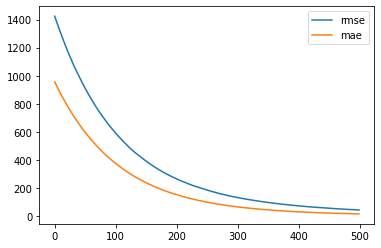

In [1589]:
# plot learning curves
plt.plot(rmse, label='rmse')
plt.plot(mae, label='mae')
# show the legend
plt.legend()
# show the plot
plt.show()

In [1590]:
# Wow, this model fit has incredible results for RMSE and MAE. XGBoost is quite the performer for small datasets after 500 epochs.

In [1591]:
# Create predictions from X_test
y_pr = model.predict(X_test)

In [1592]:
# Inspect predictions
y_pr

array([2213.472,  525.319,  312.333, 1170.015,  697.947, 1488.842,
        877.267, 1580.562, 1145.497,  984.422,  261.404,  466.545,
       1718.428,   31.563,  116.042,  337.072, 1214.988,  169.14 ,
        496.928, 2724.705, 4122.547, 1321.603,  196.034,  925.42 ,
       2456.22 ,  424.125,  224.19 ,   32.599,  439.811, 2593.877,
        386.383,  209.632, 4207.179, 4153.181, 1501.538,   67.961,
       1245.699,  511.609,  105.728, 1472.863, 3502.792, 2733.193,
       3905.897,   67.006,  302.91 ,  280.89 ,  506.818,   75.03 ,
        387.311, 3224.302, 2433.256, 2545.245, 3158.73 ,  402.635,
        385.22 , 2947.507, 1413.111, 2572.878,  758.12 ,   97.432,
       1194.489,  161.1  , 1013.954,  105.094, 1487.276,  786.025,
        486.216, 1781.781, 2564.765, 3758.303,  179.87 , 3265.643,
        404.338, 1652.453, 4168.224,  228.731,  550.814, 1588.932,
       4060.942, 3972.628,  382.791,   42.748,  449.706, 2498.469,
       4527.613,  444.702, 3272.326,  369.76 ,   54.49 ,  373.

In [1593]:
y_test

255    2054
256     519
257     285
258    1136
259     738
260    1446
261     960
262    1704
263    1124
264     901
265     253
266     521
267    1849
268      39
269     110
270     340
271    1243
272     162
273     531
274    3766
275    4761
276    1581
277     156
278     740
279    2530
280     381
281     202
282      34
283     433
284    2404
285     416
286     211
287    4127
288    4472
289    1615
290      77
291    1328
292     563
293      62
294    1360
295    3695
296    2744
297    4113
298      56
299     310
300     290
301     521
302      78
303     375
304    3243
305    2387
306    2555
307    3076
308     326
309     365
310    2888
311    1401
312    2091
313     672
314     123
315    1495
316     142
317     903
318      95
319    1693
320     728
321     510
322    1587
323    2541
324    3493
325      87
326    6258
327     384
328    1811
329    5151
330     193
331     584
332    1845
333    6666
334    4256
335     354
336      49
337     469
338 

In [1594]:
y_pr

array([2213.472,  525.319,  312.333, 1170.015,  697.947, 1488.842,
        877.267, 1580.562, 1145.497,  984.422,  261.404,  466.545,
       1718.428,   31.563,  116.042,  337.072, 1214.988,  169.14 ,
        496.928, 2724.705, 4122.547, 1321.603,  196.034,  925.42 ,
       2456.22 ,  424.125,  224.19 ,   32.599,  439.811, 2593.877,
        386.383,  209.632, 4207.179, 4153.181, 1501.538,   67.961,
       1245.699,  511.609,  105.728, 1472.863, 3502.792, 2733.193,
       3905.897,   67.006,  302.91 ,  280.89 ,  506.818,   75.03 ,
        387.311, 3224.302, 2433.256, 2545.245, 3158.73 ,  402.635,
        385.22 , 2947.507, 1413.111, 2572.878,  758.12 ,   97.432,
       1194.489,  161.1  , 1013.954,  105.094, 1487.276,  786.025,
        486.216, 1781.781, 2564.765, 3758.303,  179.87 , 3265.643,
        404.338, 1652.453, 4168.224,  228.731,  550.814, 1588.932,
       4060.942, 3972.628,  382.791,   42.748,  449.706, 2498.469,
       4527.613,  444.702, 3272.326,  369.76 ,   54.49 ,  373.

In [1595]:
len(y_pr)

102

Text(0, 0.5, 'Predictions')

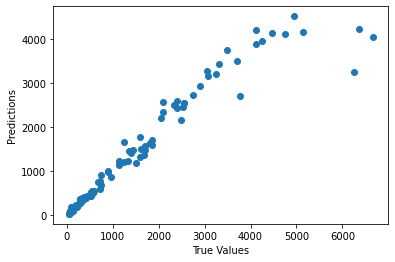

In [1596]:
# Comparing y_test with y_predictions
plt.scatter(y_test, y_pr)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [1597]:
# Creating Plotting function for predictions against y_test

def plotGraph(y_test,y_pr,regressorName):
    if max(y_test) >= max(y_pr):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pr))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pr)), y_pr, color='red')
    plt.title(regressorName)
    plt.show()
    return

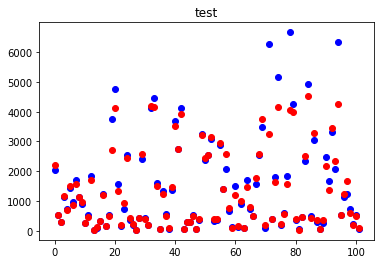

In [1598]:
# Plotting data points of y_test (blue) and y_predictions (red).
plotGraph(y_test, y_pr, "test")

In [1599]:
# Inserting zeros for all prior years to 2019 and 2020 to reform the length of the predictions list to comply with original dataframe.
for item in range(int(255)):
    y_pr = np.insert(y_pr, 0,0)

In [1600]:
# Checking to see if length matches original dataframe.
len(y_pr)

357

In [1601]:
len(data)

357

In [1602]:
# Storing updated y_predictions list in dataframe.
data['Opioid_death_predictions_XGBoost_2019-2020'] = y_pr

In [1603]:
# Reversing Label Encoder to return State feature to it's original state.
data.State = le.inverse_transform(State)

In [1604]:
# Data Overview
data.head()

,State,Population,Year,Cannabis Users 12+,Cannabis Consumption Percentage,Opioid Deaths,Opioid Deaths Percentage,Total Drug Deaths,Total Drug Deaths Percentage,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med),Status_Both,Status_Medical,Status_Neither,Opioid_death_predictions_XGBoost_2019-2020
0,Alabama,4843737,2014,404000,8.34,303,0.0063,723,0.0149,0,0,1,2021,0,1,0,1,0,0.0
1,Alabama,5960064,2014,670000,11.24,1084,0.0182,1070,0.0180,0,0,1,2013,0,9,0,1,0,0.0
2,Alabama,10071204,2014,963000,9.56,839,0.0083,1206,0.0120,0,0,1,2015,0,7,0,1,0,0.0
3,Alabama,849670,2014,62000,7.30,20,0.0024,63,0.0074,0,0,1,2020,0,2,0,1,0,0.0
4,Alabama,19853880,2014,1990000,10.02,1611,0.0081,2634,0.0133,0,0,1,2016,0,6,0,1,0,0.0


In [1605]:
# Store new dataframe with predictions
data.to_csv('C:\\Users\\John\\Documents\\Berkeley\\Classwork\\group project\\data\\percaps_w_legality_and_predictions.csv',index=False)